Recall the pd_speech.arff dataset from earlier homeworks, centered on the Parkinson diagnosis from
speech features. For the following exercises, normalize the data using sklearn’s MinMaxScaler.

#### Using sklearn, apply k-means clustering fully unsupervisedly (without targets) on the normalized data with 𝑘 = 3 and three different seeds (using random ε {0,1,2}). Assess the silhouette and purity of the produced solutions

In [92]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.metrics import silhouette_score


# Load the data
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
Y = df['class']

In [93]:
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import MinMaxScaler

#normalize the data with MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])

#compute purity
def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

seeds = [0, 1, 2]
#apply k-means clustering fully unsupervisedly (without targets) on the normalized data with 𝑘 = 3 and three different seeds (using random ε {0,1,2}).
for seed in seeds:
    #parameterize clustering
    kmeans = cluster.KMeans(n_clusters=3, random_state=seed)

    #learn model
    kmeans_model = kmeans.fit(X)

    # ckeck the poduced clusters
    y_pred = kmeans_model.labels_

    print("Seed: ", seed)
    print("Silhouette:", metrics.silhouette_score(X, y_pred, metric='euclidean'))
    print("Purity:", purity_score(Y, y_pred))
    print("\n")

Seed:  0
Silhouette: 0.11362027575179438
Purity: 0.7671957671957672


Seed:  1
Silhouette: 0.1140355420137708
Purity: 0.7632275132275133


Seed:  2
Silhouette: 0.11362027575179438
Purity: 0.7671957671957672




#### What is causing the non-determinism? 

In the previous question, we saw that the results of the silhouette and purity were non-deterministic. The cluster.KMeans function has a parameter called random_state. This parameter determinates random number generation for centroid initialization and we use an integer in this parameter to make the randomness deterministic. Different random_state values will not prevent the algorithm from converging to the same final point since we can see that seed 0 and seed 2 results are the same. However, the results for seed 1 are different from the others due to the randomness in the initialization of the centroids and that is what is causing the non-determinism.

#### Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0). To this end, select the two most informative features as axes and color observations according to their label. For feature selection, select the two input variables with highest variance on the MinMax normalized data

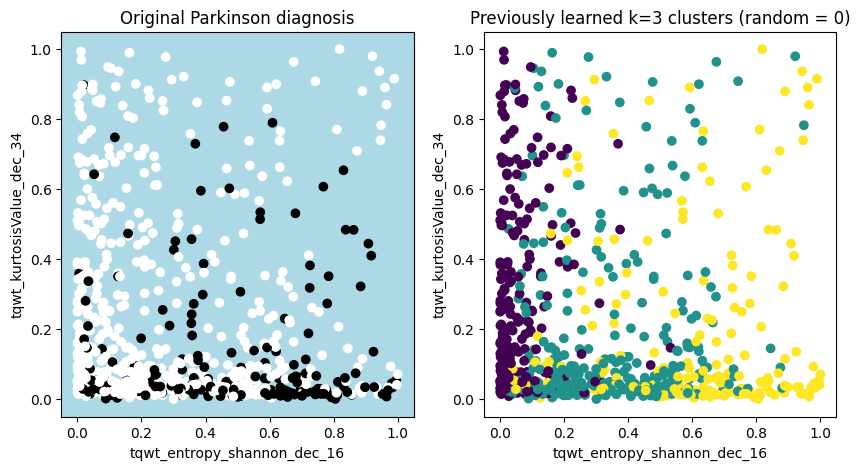

In [96]:
import matplotlib.pyplot as plt

#select the 2 features with the highest variance
Xnew = X.var().sort_values(ascending=False).head(2)

colors = [Y, y_pred]

#plot side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    ax[i].scatter(X[Xnew.index[0]], X[Xnew.index[1]], c=colors[i])
    ax[i].set_xlabel(Xnew.index[0])
    ax[i].set_ylabel(Xnew.index[1])
    if i == 0:
        #background color
        ax[i].set_facecolor('lightblue')
        ax[i].set_title('Original Parkinson diagnosis')
    else:
        ax[i].set_title('Previously learned k=3 clusters (random = 0)')
plt.show()




#### The fraction of variance explained by a principal component is the ratio between the variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues). How many principal components are necessary to explain more than 80% of variability? Hint: explore the DimReduction notebook to be familiar with PCA in sklearn.

In [98]:
#The fraction of variance explained by a principal component is the ratio between the
#variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues).
#How many principal components are necessary to explain more than 80% of variability?

from sklearn.decomposition import PCA

#apply PCA
pca = PCA(n_components=0.8)
pca.fit(X)

#number of components
print("Number of components:", pca.n_components_)

Number of components: 31
